In [18]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [28]:
tf.__version__

'2.18.0'

In [34]:
# -----------------------------
# Direktori Dataset
BASE_DIR = r'C:\Users\ASUS\Documents\ML CNN (Bangkit)'  # Sesuaikan path dengan lokasi sebenarnya
DATA_DIR = os.path.join(BASE_DIR, 'dataset', 'downSyndrome')

# Subdirectories
DOWN_SYNDROME_DIR = os.path.join(DATA_DIR, 'downSyndrome')
HEALTHY_DIR = os.path.join(DATA_DIR, 'healty')

# Cek jumlah gambar per kelas
print(f"There are {len(os.listdir(DOWN_SYNDROME_DIR))} images of Down Syndrome.")
print(f"There are {len(os.listdir(HEALTHY_DIR))} images of Healthy.")


There are 1500 images of Down Syndrome.
There are 1499 images of Healthy.


In [38]:
# -----------------------------
# Hyperparameter
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
EPOCHS = 10

# -----------------------------
# Data Augmentasi dan Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalisasi nilai pixel [0, 1]
    rotation_range=20,         # Rotasi gambar secara acak
    width_shift_range=0.2,     # Pergeseran horizontal
    height_shift_range=0.2,    # Pergeseran vertikal
    shear_range=0.2,           # Shear
    zoom_range=0.2,            # Zoom
    horizontal_flip=True,      # Membalik gambar secara horizontal
    validation_split=0.15      # Memisahkan dataset validasi
)

In [40]:
# -----------------------------
# Generator Dataset
train_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Untuk klasifikasi biner
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# -----------------------------
# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Aktivasi sigmoid untuk klasifikasi biner
])

Found 2550 images belonging to 2 classes.
Found 449 images belonging to 2 classes.


E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# -----------------------------
# Kompilasi Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Pelatihan Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 63s 768ms/step - accuracy: 0.5309 - loss: 1.0029 - val_accuracy: 0.5702 - val_loss: 0.6755
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 61s 762ms/step - accuracy: 0.6525 - loss: 0.6377 - val_accuracy: 0.6281 - val_loss: 0.6864
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 61s 762ms/step - accuracy: 0.6583 - loss: 0.6183 - val_accuracy: 0.5724 - val_loss: 0.6691
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 63s 783ms/step - accuracy: 0.6539 - loss: 0.6145 - val_accuracy: 0.5924 - val_loss: 0.6693
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 775ms/step - accuracy: 0.6474 - loss: 0.6219 - val_accuracy: 0.6125 - val_loss: 0.6768
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 769ms/step - accuracy: 0.6511 - loss: 0.6079 - val_accuracy: 0.5947 - val_loss: 0.6683
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 771ms/step - accuracy: 0.6771 - loss: 0.5948 - val_accuracy: 0.6125 - val_loss: 0.6522
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 62s 768ms/step - accuracy: 0.6925 - loss: 0.5678 - val_accu

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - accuracy: 0.6369 - loss: 0.6328
Validation Loss: 0.6380301117897034
Validation Accuracy: 0.634743869304657


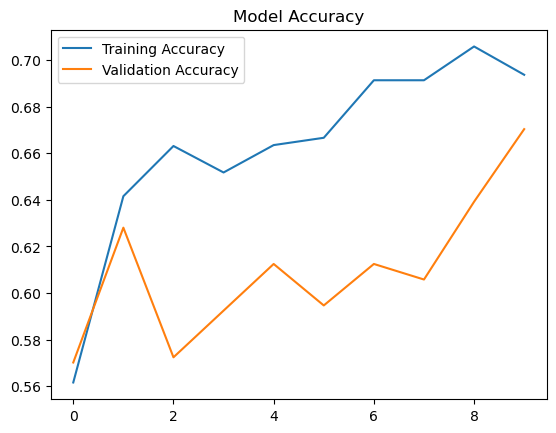

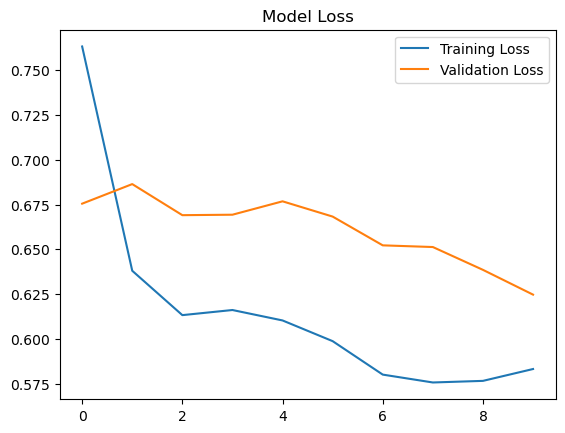

In [46]:
# -----------------------------
# Evaluasi Model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# -----------------------------
# Visualisasi Hasil Pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [50]:
def create_model_with_mobilenet():
    """
    Creates a model using MobileNet for transfer learning and custom classification layers.

    Returns:
        tf.keras.Model: The compiled model for training.
    """
    # Load the MobileNetV2 model pre-trained on ImageNet
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(120, 120, 3),
        include_top=False,  # Exclude the top fully-connected layers
        weights='imagenet'  # Load pre-trained weights
    )

    # Freeze the base model's layers
    base_model.trainable = False

    # Create the model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(120, 120, 3)),  # Define input shape
        tf.keras.layers.Rescaling(1.0 / 255),        # Rescale pixel values to [0, 1]
        base_model,                                  # Add the pre-trained MobileNetV2
        tf.keras.layers.GlobalAveragePooling2D(),   # Pool features into a single vector
        tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer
        tf.keras.layers.Dropout(0.5),               # Add dropout for regularization
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [56]:
# Compile the model again with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Use a lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    epochs=10,  # Train for additional epochs
    validation_data=val_generator,
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 69s 849ms/step - accuracy: 0.7152 - loss: 0.5424 - val_accuracy: 0.6570 - val_loss: 0.6236
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 790ms/step - accuracy: 0.7181 - loss: 0.5535 - val_accuracy: 0.6414 - val_loss: 0.6407
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 63s 787ms/step - accuracy: 0.7285 - loss: 0.5361 - val_accuracy: 0.6659 - val_loss: 0.6263
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 797ms/step - accuracy: 0.7137 - loss: 0.5535 - val_accuracy: 0.6503 - val_loss: 0.6331
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 68s 853ms/step - accuracy: 0.6921 - loss: 0.5591 - val_accuracy: 0.6860 - val_loss: 0.6045
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 883ms/step - accuracy: 0.7025 - loss: 0.5529 - val_accuracy: 0.6503 - val_loss: 0.6239
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 887ms/step - accuracy: 0.7424 - loss: 0.5303 - val_accuracy: 0.6637 - val_loss: 0.6146
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 907ms/step - accuracy: 0.7243 - loss: 0.5493 - val_accu

In [58]:
# -----------------------------
# Simpan Model
MODEL_PATH = os.path.join(BASE_DIR, 'downsyndrome_classification_model.h5')
model.save(MODEL_PATH)
print(f"Model saved successfully at {MODEL_PATH}!")

Model saved successfully at C:\Users\ASUS\Documents\ML CNN (Bangkit)\downsyndrome_classification_model.h5!


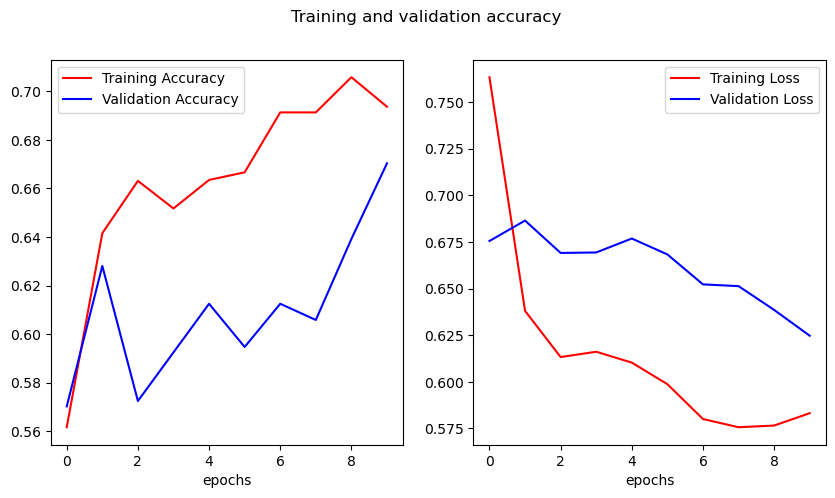

In [60]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()